In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import powerlaw
from scipy.optimize import minimize
import plotly.graph_objects as go
import pandas as pd

C:\Users\ldonaire\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
n=1000

In [106]:
# def generate_double_power_law(alpha1, alpha2, xmin, x_c, size):
#     size1 = int(size / 2)  # Número de pontos antes de x_c
#     size2 = size - size1   # Número de pontos depois de x_c
    
#     # Gerar dados na primeira faixa (xmin a x_c)
#     data1 = generate_power_law(alpha1, xmin, size1)
    
#     # Gerar dados na segunda faixa (x_c em diante)
#     data2 = generate_power_law(alpha2, x_c, size2)
    
#     return np.concatenate([data1, data2])

# # Parâmetros da Double Power-Law
# alpha1 = 2.0
# alpha2 = 3.0
# xmin = 1.0
# x_c = 10.0

# # Gerar dados Double Power-Law
# data_double_powerlaw = generate_double_power_law(alpha1, alpha2, xmin, x_c, n)

In [3]:
def fit_exp(dados):
    loc, LambdaInv = stats.expon.fit(dados)
    return 1/LambdaInv

def fit_norm(dados):
    return stats.norm.fit(dados)

def fit_lognorm(dados):
    return stats.lognorm.fit(dados, floc=0)

def fit_powerlaw(dados):
    powerlawfit = powerlaw.Fit(dados)
    return powerlawfit.alpha, powerlawfit.xmin

    # xmin = np.min(dados) ################################
    # alpha_est = 1 + len(dados) / np.sum(np.log(dados / xmin))
    # return alpha_est, xmin
    # R, p = results.distribution_compare('power_law', 'lognormal')

def fit_double_powerlaw(dados):
    return Exception('A Ser Implementado')

In [4]:
def test_exp(dados):
    Lambda = fit_exp(dados)
    statistic, p_value = stats.kstest(dados, 'expon', args=(0, 1/Lambda))
    return p_value

def test_norm(dados):
    mean, std = fit_norm(dados)
    statistic, p_value = stats.kstest(dados, 'norm', args=(mean, std))
    return p_value

def test_lognorm(dados):
    shape, loc, scale = fit_lognorm(dados)
    statistic, p_value = stats.kstest(dados, 'lognorm', args=(shape, loc, scale))
    return p_value


In [5]:
lambda_param = 1.3
data_exponencial = np.random.exponential(1/lambda_param, n)
print(test_exp(data_exponencial))

0.8513186824005836


In [6]:
mu = 0  # média
sigma = 1  # desvio padrão
data_normal = np.random.normal(mu, sigma, n)
print(test_norm(data_normal))

0.6310944836439851


In [7]:
mu_lognorm = 0  # média do logaritmo
sigma_lognorm = 1  # desvio padrão do logaritmo
data_lognormal = np.random.lognormal(mu_lognorm, sigma_lognorm, n)
print(test_lognorm(data_lognormal))

0.919799469667248


In [17]:
alpha_powerlaw = 2.5
xmin = 1.0
data_powerlaw = powerlaw.Power_Law(xmin=xmin, parameters=[alpha_powerlaw]).generate_random(1000)

In [18]:
fit_powerlaw(data_powerlaw)

Calculating best minimal value for power law fit


(np.float64(2.4576689921707757), np.float64(1.0465001964604097))

Calculating best minimal value for power law fit


<Axes: >

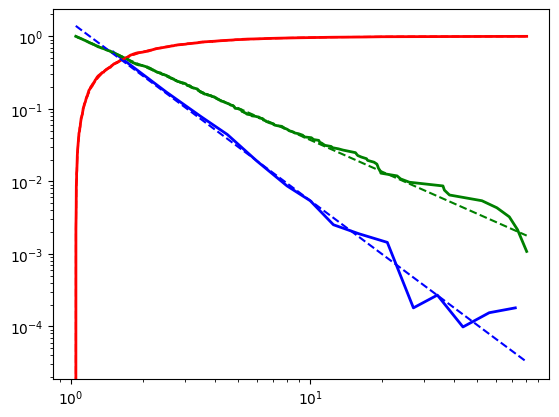

In [19]:
# powerlaw.plot_pdf(data_powerlaw, color='b', linear_bins=True)
# powerlaw.plot_pdf(data_powerlaw, color='b')
# powerlaw.plot_pdf(data_double_powerlaw, color='b')

fit = powerlaw.Fit(data_powerlaw)
# fit = powerlaw.Fit(data_double_powerlaw)
fig2 = fit.plot_pdf(color='b', linewidth=2)
fig2 = fit.plot_cdf(color='r', linewidth=2)
fig2 = fit.plot_ccdf(color='g', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
fit.power_law.plot_cdf(color='r', linestyle='--', ax=fig2)
fit.power_law.plot_ccdf(color='g', linestyle='--', ax=fig2)

In [28]:
# fit = powerlaw.Fit(data_powerlaw)
fit = powerlaw.Fit(data_exponencial)
for dist in fit.supported_distributions.keys():
    print(dist)
    R,p = fit.distribution_compare('power_law',dist)
    print(p)
    print(R)


Calculating best minimal value for power law fit
power_lawress: 99%
1.0
0.0
lognormal
0.5957980646344283
-0.2512365761676665
exponential
0.8361987158697152
0.27950223446439915
truncated_power_law
0.3831994601597233
-0.3802062539981238
stretched_exponential
0.5845148712189718
-0.3009004652406395
lognormal_positive
0.9614289474620215
-0.044161057775566004


Assuming nested distributions
Assuming nested distributions


In [48]:
parameter_range = {'xmin': [None, data_exponencial[len(data_exponencial)//2] ]}

fit = powerlaw.Fit(data_exponencial,parameter_range=parameter_range)
fit.distribution_compare('power_law','exponential')

Calculating best minimal value for power law fit


(np.float64(-574.6194466182269), np.float64(1.9439060111378985e-104))

In [32]:
lambda_param = 1.3
data_exponencial = np.random.exponential(1/lambda_param, 10*n)

fit = powerlaw.Fit(data_exponencial)
# fit.distribution_compare('power_law','exponential')
fit.distribution_compare('power_law','exponential')

# fit.distribution_compare('lognormal','power_law')

Calculating best minimal value for power law fit


(np.float64(0.959428771351216), np.float64(0.48847491928502784))

In [40]:
# fit.xmin
# plt.hist(data_exponencial)
len([item for item in data_exponencial if item >= fit.xmin])

54

<Axes: >

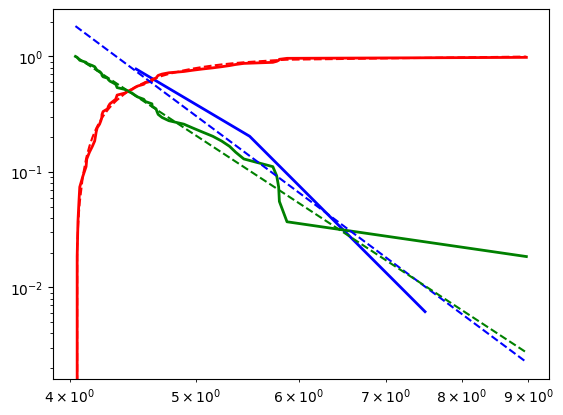

In [34]:
fig2 = fit.plot_pdf(color='b', linewidth=2)
fig2 = fit.plot_cdf(color='r', linewidth=2)
fig2 = fit.plot_ccdf(color='g', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
fit.power_law.plot_cdf(color='r', linestyle='--', ax=fig2)
fit.power_law.plot_ccdf(color='g', linestyle='--', ax=fig2)

In [33]:
test_exp(data_exponencial)

np.float64(0.7294790487127822)

--
Implementando um Algoritmo para Ajustar a Double Power-law
A Double Power-law é uma distribuição que apresenta dois regimes de potência, ou seja, duas leis de potência com diferentes expoentes. Ela é útil para modelar fenômenos que apresentam um comportamento de lei de potência em duas faixas diferentes.

Desafios da Implementação:

Identificação do Ponto de Quebra: É necessário determinar o ponto onde ocorre a transição entre as duas leis de potência.
Estimação de Quatro Parâmetros: Além dos dois expoentes, é preciso estimar o valor mínimo para cada lei de potência.
Otimização: A escolha do método de otimização para encontrar os melhores parâmetros pode influenciar a qualidade do ajuste.
Abordagem Proposta:

Divisão dos Dados:

Método Visual: Plotar o histograma dos dados em escala log-log para identificar visualmente um possível ponto de quebra.
Método Estatístico: Utilizar um teste de hipótese para verificar se os dados podem ser divididos em duas partes que seguem leis de potência diferentes.
Estimação dos Parâmetros:

Máxima Verossimilhança: Construir a função de verossimilhança para a Double Power-law e utilizar um algoritmo de otimização (como o método de Newton-Raphson ou o algoritmo Nelder-Mead) para encontrar os valores dos parâmetros que maximizam essa função.
Mínimos Quadrados: Minimizar a soma dos quadrados das diferenças entre os dados observados e os valores esperados pela distribuição.
Validação do Modelo:

Teste de Kolmogorov-Smirnov: Comparar a distribuição empírica dos dados com a distribuição teórica ajustada.
Análise Visual: Plotar os dados e a distribuição ajustada em escala log-log para verificar a qualidade do ajuste.
Critérios de Informação: Calcular critérios como AIC e BIC para comparar diferentes modelos.
Código Python (Exemplo com Máxima Verossimilhança):

Python
import numpy as np
from scipy.optimize import minimize

def double_power_law(x, xmin1, xmax, alpha1, alpha2):
    -- Função de densidade de probabilidade da Double Power-law
    return np.where(x < xmax,
                    (alpha1 - 1) * xmin1**alpha1 / x**alpha1,
                    (alpha2 - 1) * xmax**alpha2 / x**alpha2)

def log_likelihood(params, x):
    xmin1, xmax, alpha1, alpha2 = params
    return -np.sum(np.log(double_power_law(x, xmin1, xmax, alpha1, alpha2)))

-- Dados simulados
data = np.concatenate([np.random.power(2.5, 500), np.random.power(1.5, 500)])

-- Estimativa dos parâmetros
result = minimize(log_likelihood, [1, np.median(data), 2.5, 1.5], args=(data,))
xmin1, xmax, alpha1, alpha2 = result.x

-- Plotar os resultados
-- ... (código para plotar os dados e a distribuição ajustada)
Use o código com cuidado.

Considerações:

Complexidade: A implementação da Double Power-law é mais complexa que a da Power-law simples.
Múltiplas Soluções: Pode haver múltiplos mínimos locais na função de verossimilhança, o que pode levar a diferentes soluções.
Sensibilidade aos Parâmetros Iniciais: A escolha dos valores iniciais para a otimização pode influenciar o resultado final.
Outras Bibliotecas: Algumas bibliotecas especializadas em análise de redes complexas podem oferecer funções para ajustar a Double Power-law.
Extensões:

Generalizações: É possível generalizar a Double Power-law para incluir mais de dois regimes de potência.
Modelos Bayesianos: Utilizar métodos Bayesianos para estimar os parâmetros e obter intervalos de confiança.
Outras Distribuições: Comparar a Double Power-law com outras distribuições de cauda pesada, como a Pareto generalizada.
Observações:

A escolha do método de otimização e dos valores iniciais dos parâmetros pode influenciar significativamente os resultados.
A validação do modelo é fundamental para garantir que o ajuste seja adequado aos dados.
A interpretação dos resultados deve levar em consideração as limitações do modelo e dos dados.
Gostaria de explorar algum desses tópicos com mais profundidade?

Possíveis tópicos para explorar:

Comparação de diferentes métodos de otimização para ajustar a Double Power-law.
Implementação de um algoritmo para ajustar a Double Power-law utilizando o método dos mínimos quadrados.
Aplicações da Double Power-law em redes sociais, física estatística e outras áreas.
Relação entre a Double Power-law e outras distribuições de probabilidade.
Qual sua dúvida específica?